# Clustering Homework Pattanai Jiworawiwat 6030817021

In [22]:
import pandas as pd 
import numpy as np 
import datetime as dt

In [26]:
fire_data = pd.read_excel('/Users/pattanaijiworawiwat/Downloads/Fire_Data.xlsx')

In [27]:
fire_data

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,2003,N,VIIRS,n,1,294.4,7.2,0
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.9,0
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.2,0
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,292.7,2.9,0


In [28]:
fire_data['Time'] = fire_data['ACQ_TIME'] #สร้างcolumใหม่

In [29]:
fire_data['Time'] = fire_data['Time'].astype(str).str.zfill(4) #เพิ่ม0หลักข้างหน้าสุดถ้าไม่ครบ4ตำแหน่ง

In [30]:
fire_data['Time'] = fire_data['Time'].str.slice(stop=2)+':'+fire_data['Time'].str.slice(start=2) 
#เปลี่ยนเครื่องหมาย

In [31]:
fire_data['Time'] = pd.to_datetime(fire_data['ACQ_DATE'].astype(str)+' '+fire_data['Time'])

In [32]:
fire_data['Time'] = pd.to_datetime(fire_data['Time'] ,unit='s' ,origin='unix').astype(int)/10**10 #เปลี่ยนform

In [33]:
minunixtime = fire_data['Time'].min()

In [34]:
fire_data['Time'] = fire_data['Time']-minunixtime

In [35]:
dataset = fire_data[['LATITUDE','LONGITUDE','Time']]

In [38]:
dataset_2=dataset.head(717) #เลือก 7 วัน
dataset_2

,LATITUDE,LONGITUDE,Time
0,16.33696,98.70137,0.0
1,16.48906,98.73961,0.0
2,16.93571,99.06874,0.0
3,16.54092,98.59869,0.0
4,16.87473,98.63222,0.0
...,...,...,...
712,17.07450,98.38679,56274.0
713,17.40994,99.13846,56274.0
714,16.40887,98.64652,56274.0
715,18.47282,99.13702,56274.0


In [39]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
plt.rcParams['figure.figsize']=(8,5.5)
plt.rcParams['figure.dpi']=120

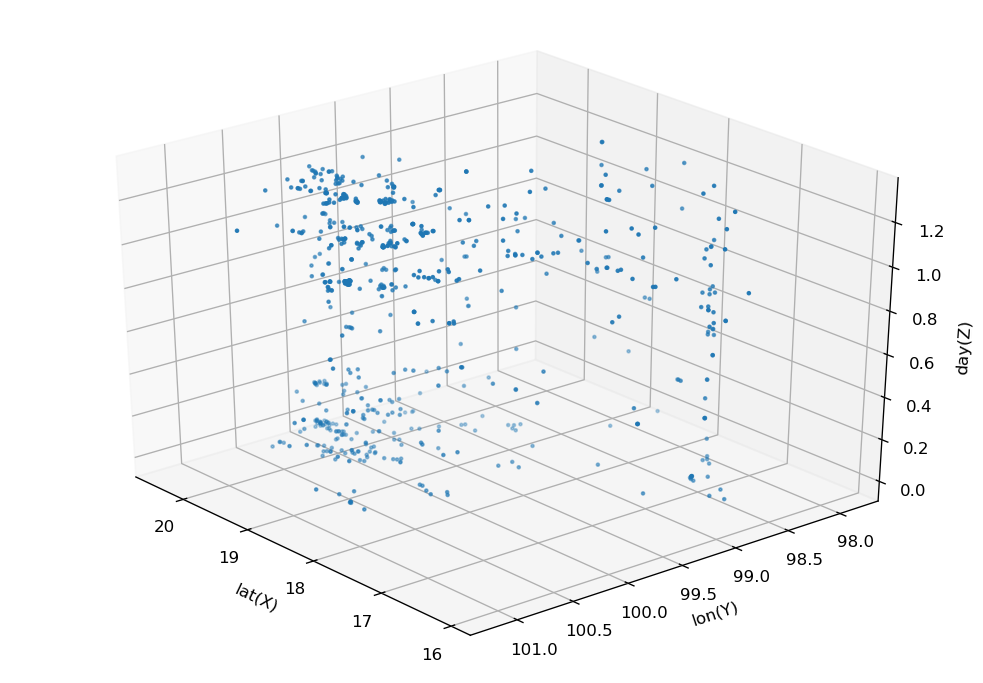

In [41]:
from mpl_toolkits.mplot3d import Axes3D #สร้างกราฟ3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(dataset_2['LATITUDE'], dataset_2['LONGITUDE'], dataset_2['Time']/43200, s=3)
ax.view_init(azim=140)
ax.set_xlabel('lat(X)')
ax.set_ylabel('lon(Y)')
ax.set_zlabel('day(Z)')
plt.show()

In [42]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN

In [43]:
lat7 = np.array(dataset_2.values.tolist())
lat7

array([[1.633696e+01, 9.870137e+01, 0.000000e+00],
       [1.648906e+01, 9.873961e+01, 0.000000e+00],
       [1.693571e+01, 9.906874e+01, 0.000000e+00],
       ...,
       [1.640887e+01, 9.864652e+01, 5.627400e+04],
       [1.847282e+01, 9.913702e+01, 5.627400e+04],
       [1.869487e+01, 9.834657e+01, 5.627400e+04]])

In [47]:
db = DBSCAN(eps=2, min_samples=18).fit(lat7)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
dblabels = db.labels_
n_clusters_ = len(set(dblabels)) - (1 if -1 in dblabels else 0)
n_noise_ = list(dblabels).count(-1)

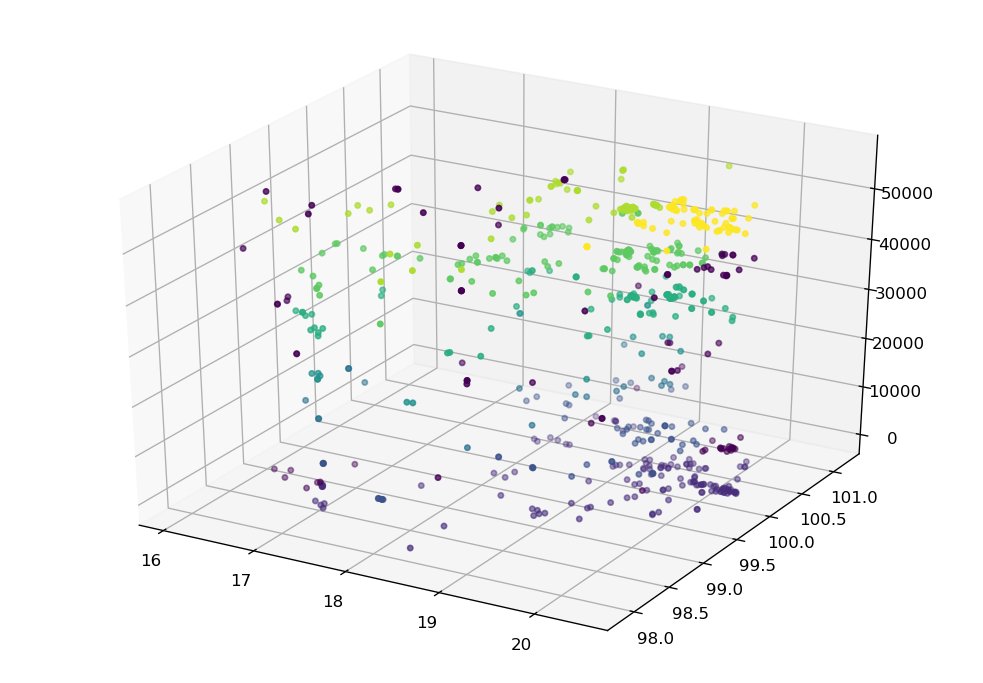

In [48]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(lat7[:,0], lat7[:,1], lat7[:,2], c=dblabels, s=10)
#ax.view_init(azim=200)
plt.show()

In [49]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(lat7, dblabels)

0.7251618483668598

การใช้เทคนิค Density Based กำหนดค่าดังนี้eps = 2 เนื่องจากแกน x,y มี range ค่อนข้างแคบ ถ้ายิ่งค่ามากค่า difference ระหว่างช่วงจะไม่สัมพันธ์กับค่า dataset ซึ่งเปลี่ยนเป็นเวลา แบบชั่วโมง ค่า Silhoulette score = 0.7251618483668598 แปลวาสแบบจำลองค่อนข้างดี ข้อมูลมีความเหมาะสม จุดที่เป็นสีม่วงคือข้อมูล outliers